# 목차

1. CutMix : Regularization Strategy to Train Strong Classifiers with Localizable Features (논문 리뷰)

# 1. CutMix : Regularization Strategy to Train Strong Classifiers with Localizable Features (논문 리뷰)

<br>

- 유튜브 논문익는 마을 : https://youtu.be/klayBE1MgW0 (발표자 김정예)

<br>

CutMix는 2020년 네이버 Clova에서 발표한 내용<br>
Augmentation의 한 방법인 CutMix를 소개하고 있다.

<br>

## 1. Introduction

![](https://images.velog.io/images/seona056/post/85752683-f751-4a37-aae3-bff997b4c045/image.png)

- 딥러닝에서는 학습 효율이나 퍼포먼스를 높이기 위해서 augmentation과 regularization 테크닉을 많이 사용한다.
- CNN의 경우, input 이미니즤 작은 부분이나 특징이 되는 아주 일부분만 집중을 하게 되면 성능 향상이 저해된다. 👉 이런 문제 때문에 feature에서 랜덤하게 제거하는 regularization이 사용된다.

|||
| --- | --- |
| `dropout` | 무작위로 hidden activation 노드 몇 개를 떨구는 것 |
| `regional dropout` | input 이미지의 랜덤한 영역들을 지우는 방법 |

→ 이런 방법을 사용하면 모델의 일반화와 localization의 성능이 향상된다.

모델이 일부 영역이 아니라 오브젝트 전체 영역에 대해 집중을 하게 되기 때문.

- 대부분의 `regional dropout`은 랜덤 노이즈를 넣거나 `0`으로 모두 채우는 방식을 사용 →  픽셀이 담고 있는 정보가 상당수 사라지는 문제점이 발생(**Data hungry**)
- CNN에서 일반적으로 `data hungry`가 나타나므로 심각한 개념적 제한이 생김 → 이를 보완하고자 cutmix를 만들어 냄



## 2. Related Works

### 2-1 ) regional dropout

![](https://images.velog.io/images/seona056/post/eaab843f-6e1a-42fe-8ab4-2d72eed43905/image.png)

- 위 슬라이드에서 `(b)`가 **regional dropout**의 예시이다. activation들을 랜덤하게 없애주는 것 (`0`으로 채워준다)
- regional dropout을 개선한 것이 `(c)`의 **dropblock**이다.
- 비슷한 영역에 있는 activation들은 긴밀한 관계를 갖기 때문에 regional dropout과 같이 sparse하게 삭제를 해 봤자 시멘틱 정보들이 크게 날아가지 않아서 별로 효과가 없다고 함.
- 그래서 drop할 블록을 생성하여 블록 영역을 모두 삭제하는 방법을 사용한다.
- 이 것을 feature space에서 사용하면 모델의 일반화가 더 잘 일어나게 된다고 함.
- **cutmix**의 경우에도 input 이미지 뿐만 아니라 feature space에서도 사용이 가능

### 2-2) Synthesizing training data

- train data를 합성하는 방법

### Stylizing ImageNet

![](https://images.velog.io/images/seona056/post/f70bfbe4-048c-4efd-b91e-54a375a45d62/image.png)

- 모델이 texture가 아니라 shape에 집중할 수 있도록 만들어 주는 방법
- 위의 슬라이드에서, 코끼리 텍스쳐와 고양이 모양을 합성을 해서 `(c)`가 생성된다.
- `(c)`의 경우 보통 모델이 texture를 좀 더 인식하여 **Indian elephant**라고 분류하게 됨
- 이런 점을 개선하기 위해 stylizing ImageNet을 제시하고 있다.
- stylizing ImageNet이 추가적인 cost가 매우 큰 것에 비해, 논문에서 제시하는 **cutmix**는 적은 추가 비용으로도 효과를 얻을 수 있다고 함

### Object insertion

![](https://images.velog.io/images/seona056/post/f0a03061-f76b-4a15-a4bd-d534b1f6e52c/image.png)

- 배경에 오브젝트를 합성 시켜주는 방법
- **cutmix**의 경우에도 샘플을 combine하기 때문에 다수의 오브젝트를 가질 수 있다는 공통점이 있다.
- 하지만 **object insertion**은 배경에 대한 저항성은 커지지만, 오브젝트 각각을 구분하는 데는 큰 성능 향상이 일어나지 않는다.
- **cutmix**는 배경에 대한 저항성도 커지고, 물체에 대한 구별도 가능하다는 장점이 있다.

### Mixup

![](https://images.velog.io/images/seona056/post/e1ec4fd3-dedc-4b07-854a-c720caf77b65/image.png)

- 샘플 이미지를 합성하는 것
- combine된 두 개의 이미지에 대한 **new ground truth label** (정답이라고 인식하는 라벨)은 두 개의 각각의 샘플에 대한 label에 대한 **interploation**(보간법)으로 만들어 진다.
- 육안으로 확인했을 때도 부자연스럽고, 이러한 점은 특히 localization에서도 성능이 좋지 않다는 단점이 있다.
- **cutmix**의 경우에는 이미지 분류에서도 좋은 성능을 내지만 localization task에서도, transfer learning task에서도 좋은 성능을 내게 된다.

### Cutout

![](https://images.velog.io/images/seona056/post/1ebcd6dd-57cc-4f91-8f24-fadc1b38313a/image.png)

- 위 슬라이드 중 세 번째 그림 참고
- **cutout**은 의미 있는 정보들을 모두 `0`으로 채우는 방법이지만, **cutmix**는 그 부분을 삭제하지 않고 다른 샘플로 채워주는 방법이기 때문에 정보 loss가 없다는 장점을 가진다.

### 그 외

![](https://images.velog.io/images/seona056/post/7cf9600a-f83b-4606-a357-b7292fbcb7af/image.png)

- 딥 네트워크를 학습할 때 학습의 효율을 위해서 weight decay, dropout, batch normalization과 같은 다양한 전략들을 사용
- **cutmix**에서는 위의 방법들과는 별개이다. (딥 네트워크에서의 방법이 아니라, data자체에 대한 전처리 방법이기 때문)

## 3. CutMix

### 3-1) Algorithm

<br>

![](https://images.velog.io/images/seona056/post/36b4f910-4ba0-4f09-b8af-3b15d4092567/image.png)

- `M`은 mask를 나타낸다. (삭제하는 부분)
- $x_A$ : 샘플 A, $x_B$: 샘플 B를 나타냄
- 패치를 다른 패치에서 떼와서 그대로 붙이는 방법이기 때문에, 식을 보면 그대로 나타나 있음을 알 수 있다.
- mixup보다 더 자연스러운 이미지를 얻을 수 있다.

<br>

![](https://images.velog.io/images/seona056/post/632df128-6499-4964-9ad5-e1191505a362/image.png)

- binary mask M을 만들기 위해서는, 먼저 bounding box B를 설정해 주어야한다.
- 크롭된 영역의 비율($r_w$  x $r_h/WH$)을 $1-lamda$로 표현
- 크롭된 영역을 0으로 채우고, 나머지를 1로 만들어 주는 방식으로  간단히 만들 수 있다.

<br><br>

### 3-2) 왜 cutmix의 성능이 좋은가?

<br>

![](https://images.velog.io/images/seona056/post/fa3c7432-2e00-4ea7-aacd-05746b383adf/image.png)

**cutmix**가 왜 성능이 좋은가?

- 이미지의 일부가 아닌 전체를 보게 됨
- **CAM (Class Activation Map)**을 찍어본 결과 사진을 보면,

|||
| --- | --- |
| mixup | 세인트 버나드(몸통)와 푸들(머리)를 전혀 구분하지 못함. 모델이 헷갈려한다는 것을 알 수 있다. |
| cutout | 몸통은 세인트 버나드는 잘 인식하지만, 푸들 머리정보가 아예 없어서 몸통에 CAM이 찍히는 등의 혼란이 있음 |
| cutmix | mask로 분리된 부분을 정확하게 인식하여 분류함 |

<br>

![](https://images.velog.io/images/seona056/post/e79d3097-4050-4d7c-b107-274bff10aa27/image.png)

- **cutout** : 다리나 배 같은 덜 disciminate part에서는 인식을 잘 하지만, 사용하지 않는 픽셀이 있기 때문에 효율적이지 않다.
- **mixup** : 모든 픽셀을 사용하지만, 자연스럽지 못한 이미지이기 때문에(라벨이 섞여있기 때문) 모델이 인식을 혼동함 → classification과 localization에서 안 좋은 퍼포먼스를 보이게 된다.
- **cutmix** : 위의 두 방법 중 조금 더 성능이 좋은 cutout보다도 더 좋은 성능. 두 개의 오브젝트를 정확하게 분류할 수 있음

### 3-3) 학습의 안정성 분석

### validation error 분석

<br>

![](https://images.velog.io/images/seona056/post/beb89a42-ef5d-43ba-a1b3-cfed5040e672/image.png)

- 왼쪽은 pyramidNet, 오른쪽은 ResNet 50
- 두 모델 모두 cutmix가 더 낮은 에러를 보였다.
- pyramidNet의 경우, cutmix를 적용하지 않은 모델에서는 `에폭 200` 정도에서 약간의 과적합이 일어남 → cutmix 사용 모델은 training sample이 다양해졌기 때문에 오버피팅이 일어나지 않음

<br>

![](https://images.velog.io/images/seona056/post/1d413be3-8aab-434a-b6b8-9bcfc37d913b/image.png)

- 위의 성능 지표 중 feature cutmix는 cutmix를 feature space 단에 적용한 모델이다.
- 하지만 일반 모델에 cutmix만 추가한 것이 Top-1 error, Top-5 error 모두 낮은 것을 알 수 있다.

<br>

![](https://images.velog.io/images/seona056/post/c51430c1-0852-499e-8ad5-da538a7db7e6/image.png)

- baseline이 ResNet 50인데, ResNet 101, ResNet152 등 더 깊은 레이어를 사용했을 때와 baseline에 cutmix만 추가했을 때와 에러율이 비슷하다. → cutmix만으로도 충분한 성능 향상을 보인다고 해석할 수 있다.
- 그리고 더 깊은 레이어를 사용하면 cost가 더 많이 드는데, `baseline + cutmix`는 cost가 많이 들지 않았지만 그와 비슷한 성능을 내는 것을 확인할 수 있다.

<br>

![](https://images.velog.io/images/seona056/post/f5eca147-36a7-4639-9c85-5b91504e7eb9/image.png)

- 더 깊은 모델에서도 cutmix를 사용하면 성능이 좋다는 표이다.

<br>

![](https://images.velog.io/images/seona056/post/450ea2cf-0249-47b1-b76f-c4e876955c25/image.png)

- SOTA baseline 사용
- `cutmix + shakedrop` 방식이 가장 낮은 에러를 기록했다.
- **shakedrop**은 중간 feature 단에서 노이즈를 끼워주는 것

## 4. Ablation Studies

### 4-1) Image Classification

### Performance of feature-level CutMix

<br>

![](https://images.velog.io/images/seona056/post/1358ab79-6cc0-419c-8ad8-9540fa1c626f/image.png)

- 위의 표는 feature-level 별 cutmix를 적용했을 때 성능이다.
- `0` = image level(input image), `1` = after first conv-bn, `2` = after layer1, `3` = after layer2, `4` = after layer3
- `0` input image에서 cutmix를 적용한 것이 가장 좋은 성능을 보였다.

<br>

### CutMix variations

<br>

![](https://images.velog.io/images/seona056/post/a06f3690-b461-4d84-aeb2-fe0f62a3fd4e/image.png)

- cutmix를 변형 시켜 적용해본 것
- 하지만 cutmix만 적용했을 때가 가장 성능이 좋았다.

<br><br>

### 4-2) WSOL (Weakly Supervised Object Localization)

<br>

![](https://images.velog.io/images/seona056/post/f2c42398-bb61-45d5-a630-47a27ee95afd/image.png)

- WSOL : 학습은 classification 모델로 했는데, test는 localization으로 하는 것처럼, training과 test가 다른 학습 방식을 말한다.
- WSOL에서는 CNN이 전체 object region에서 큐를 뽑아내는 것이 중요함 → 이것은 cutmix에서 목표했던 바와 일치

<br>

![](https://images.velog.io/images/seona056/post/e730fc96-15a7-4339-8ffe-ac34b149d71a/image.png)

- 빨간색이 정답, 초록색이 모델이 예측한 결과이다.
- **mixup**의 경우는 region을 너무 작게 잡고 **cutout**의 경우는 너무 크게 잡는다.
- **cutmix**는 제일 정확하게 잡는 다는 것을 확인할 수 있다.
- 오른쪽 성능 지표를 보면, `VGG + GAP + cutmix`모델이 가장 accuracy가 높았다.
- `ResNet + cutmix`를 적용했을 때도 성능이 가장 좋았다.

<br><br>

### 4-3) Transfer Learning of Pretrained Model

<br>

![](https://images.velog.io/images/seona056/post/7ffd5c2d-97e2-41a3-9da4-cc89ef50108a/image.png)

- pretraining 단계에서 cutmix를 적용해서 학습을 시키면 더 나은 pretrained model을 만들 수 있다.
- ImageNet과 Detection을 학습, Detection과 Image Captioning을 학습을 시킨 것인데, **cutmix**를 적용한 모델에서 가장 좋은 성능이 나왔다

<br><br>

### 4-4) Robustness and Uncertainty

### Robustness

<br>

![](https://images.velog.io/images/seona056/post/278b7881-ee95-42ef-8bde-cd9f2790b8d4/image.png)

- `(a)` : occlusion을 진행한 샘플에 대해서는 cutout이 성능이 좋을 수 밖에 없다.
- cutmix도 cutout만큼 성능이 좋음
- `(b)` : cutmix를 가지고 학습을 진행한 경우는 mixup 샘플에 대한 성능이 안 좋지만, 반대로 mixup으로 학습을 진행한 모델에서는 cutmix 샘플에 대한 성능이 좋지 않게 나온다.

<br>

![](https://images.velog.io/images/seona056/post/4d963076-59d7-4a3d-bc8f-135860b51d9a/image.png)

**적대적 샘플이란?** 

- 신경망을 혼란시킬 목적으로  만들어진 특수한 입력으로, 신경망으로 하여금 샘플을 잘못 분류하도록 한다.
- 사람에게는 적대적 샘플과 일반 사진이 구별이 되지 않지만, 신경망은 적대적 샘플을 올바르게 인식하지 못한다.
- 이와 같은 신경망 공격에는 여러가지가 있는데, 화이트 박스(white box) 공격 기술에 속하는 FGSM을 사용
- 화이트 박스 공격이란, 공격자가 모든 파라미터 값에 접근할 수 있다는 가정 하에 이루어지는 공격
- 위의 팬더 이미지는 Goodfellow et al에 소개 된 가장 유명한 적대적 샘플이다.
- 원본 이미지에 작은 왜곡을 추가하면 신경망으로 하여금 판다를 높은 신뢰도로 긴팔 원숭이로 잘못 인식하도록 만들 수 있다.

**FGSM**

- 신경망의 그레디언트로 이용해 적대적 샘플을 생성하는 기법
- 모델의 입력이 이미지라면, 입력 이미지에 대한 손실 함수의 그래디언트를 계산하여 그 손실을 최대화하는 이미지를 생성한다.

<br>

### Uncertainty

<br>

![](https://images.velog.io/images/seona056/post/fd7982ff-e698-4abe-92dd-3cf1a8d23d85/image.png)

- 모델의 overconfidence를 cutmix가 개선을 시켜준다는 내용

# 4-7. 프로젝트: CutMix 또는 Mixup 비교실험 하기

지금까지 기본적인 augmentation 방법을 적용해 모델을 훈련시키고, 최신 augmentation 기법을 배워 보았습니다.

<br>

이번에는 최신 기법(CutMix 또는 Mixup)을 적용해 모델을 훈련시켜 봅시다. 데이터셋에 두 가지 방법 중 하나를 적용하고, 모델을 학습시켜 주세요. 결과를 수치화하고 비교하는 것도 잊지 마세요!

<br>

우선 주요 라이브러리 버전을 확인해 볼까요?

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds

print(tf.__version__)
print(np.__version__)

2.8.0
1.21.5


In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## 데이터셋 불러오기

In [3]:
(ds_train, ds_test), ds_info = tfds.load(
    'stanford_dogs',
    split=['train', 'test'],
    shuffle_files=True,
    with_info=True,
)
print('=3')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/stanford_dogs/0.2.0.incompleteSJUS2J/stanford_dogs-train.tfrecord


  0%|          | 0/12000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/stanford_dogs/0.2.0.incompleteSJUS2J/stanford_dogs-test.tfrecord


  0%|          | 0/8580 [00:00<?, ? examples/s]

Dataset stanford_dogs downloaded and prepared to /root/tensorflow_datasets/stanford_dogs/0.2.0. Subsequent calls will reuse this data.
=3


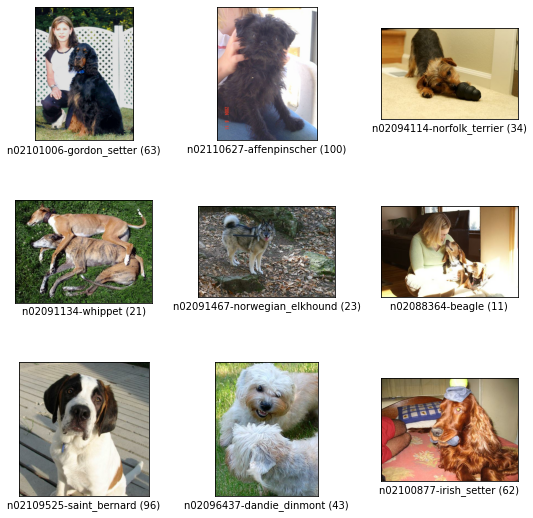

In [4]:
fig = tfds.show_examples(ds_train, ds_info)

# 1. Augmentation을 적용한 데이터셋 만들기
이전 스텝과 아래 코드를 참고하여 데이터셋에 CutMix 또는 Mixup augmentation을 적용해 주세요.

<br>

>Q1. 아래는 CutMix를 적용할 수 있도록 변경한 apply_normalize_on_dataset()입니다. <u>batch() 함수 뒤에 CutMix가 오도록</u> 만들어야합니다. 그 이유가 뭘까요?<br><br>
CutMix는 배치 안에 있는 이미지끼리만 섞는 과정이기 때문에, 미리 배치 단위로 데이터셋을 정렬 후 CutMix가 적용되어야 합니다.




## 1) 기본적인 전처리 함수

In [5]:
def normalize_and_resize_img(image, label):
    # Normalizes images: `uint8` -> `float32`
    image = tf.image.resize(image, [224, 224])
    return tf.cast(image, tf.float32) / 255., label

def augment(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.2)
    image = tf.clip_by_value(image, 0, 1)
    return image, label

In [6]:
# 데이터셋(ds)을 가공하는 메인함수
def apply_normalize_on_dataset(ds, is_test=False, batch_size=16, with_aug=False):
    ds = ds.map(
        normalize_and_resize_img,  # 기본적인 전처리 함수 적용
        num_parallel_calls=2
    )
    if not is_test and with_aug:     # test dataset이 아니고 augmentation을 적용
        ds = ds.map(
            augment,       # augment 함수 적용
            num_parallel_calls=2
        )
    ds = ds.batch(batch_size)
    if not is_test:
        ds = ds.repeat()
        ds = ds.shuffle(200)
    ds = ds.prefetch(tf.data.experimental.AUTOTUNE)
    return ds

print('=3')

=3


위의 함수를 이용하여

- augmentation이 적용되지 않은 `train image`
- augmentation이 적용된 `train image`
- `test image`

를 각각의 변수에 저장한다.

In [8]:
(ds_train, ds_test), ds_info = tfds.load(
    'stanford_dogs',
    split=['train', 'test'],
    as_supervised=True,
    shuffle_files=True,
    with_info=True,
)
ds_train_no_aug = apply_normalize_on_dataset(ds_train, with_aug=False)
ds_train_aug = apply_normalize_on_dataset(ds_train, with_aug=True)
ds_test = apply_normalize_on_dataset(ds_test, is_test=True)
print('=3')

=3


## 2) cutmix 

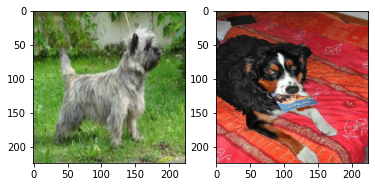

In [9]:
import matplotlib.pyplot as plt

# 데이터셋에서 이미지 2개를 가져옵니다. 
for i, (image, label) in enumerate(ds_train_no_aug.take(1)):
    if i == 0:
        image_a = image[0]
        image_b = image[1]
        label_a = label[0]
        label_b = label[1]
        break

plt.subplot(1,2,1)
plt.imshow(image_a)

plt.subplot(1,2,2)
plt.imshow(image_b)

plt.show()

바운딩 박스의 위치를 정하는 함수 `get_clip_box`를 만든다.

In [10]:
def get_clip_box(image_a, image_b):
    # image.shape = (height, width, channel)
    image_size_x = image_a.shape[1]
    image_size_y = image_a.shape[0]
    
    # get center of box
    x = tf.cast(tf.random.uniform([], 0, image_size_x), tf.int32)
    y = tf.cast(tf.random.uniform([], 0, image_size_y), tf.int32)

    # get width, height of box
    width = tf.cast(image_size_x*tf.math.sqrt(1-tf.random.uniform([], 0, 1)), tf.int32)
    height = tf.cast(image_size_y*tf.math.sqrt(1-tf.random.uniform([], 0, 1)), tf.int32)
    
    # clip box in image and get minmax bbox
    x_min = tf.math.maximum(0, x-width//2)
    y_min = tf.math.maximum(0, y-height//2)
    x_max = tf.math.minimum(image_size_x, x+width//2)
    y_max = tf.math.minimum(image_size_y, y+width//2)
    
    return x_min, y_min, x_max, y_max

x_min, y_min, x_max, y_max = get_clip_box(image_a, image_b)

print('x : ', x_min, x_max)
print('y : ', y_min, y_max)

x :  tf.Tensor(75, shape=(), dtype=int32) tf.Tensor(224, shape=(), dtype=int32)
y :  tf.Tensor(148, shape=(), dtype=int32) tf.Tensor(224, shape=(), dtype=int32)


바탕이미지 `image_a`에서 바운딩 박스 바깥쪽 영역을, 다른 이미지 `image_b`에서 바운딩 박스 안쪽 영역을 가져와서 합치는 함수

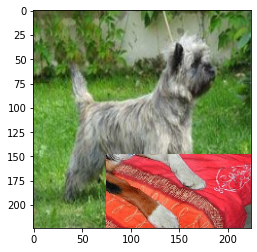

In [11]:
# mix two images
def mix_2_images(image_a, image_b, x_min, y_min, x_max, y_max):
    image_size_x = image_a.shape[1]
    image_size_y = image_a.shape[0] 
    middle_left = image_a[y_min:y_max, 0:x_min, :] # image_b의 왼쪽 바깥 영역
    middle_center = image_b[y_min:y_max, x_min:x_max, :]  # image_b의 안쪽 영역
    middle_right = image_a[y_min:y_max, x_max:image_size_x, :] # image_b의 오른쪽 바깥 영역
    middle = tf.concat([middle_left,middle_center,middle_right], axis=1)
    top = image_a[0:y_min, :, :]
    bottom = image_a[y_max:image_size_y, :, :]
    mixed_img = tf.concat([top, middle, bottom],axis=0)
    
    return mixed_img

mixed_img = mix_2_images(image_a, image_b, x_min, y_min, x_max, y_max)
plt.imshow(mixed_img.numpy())
plt.show()

**라벨 섞기**

- CutMix에서는 <u>면적에 비례해서 라벨을 섞어준다.</u>
- 섞인 이미지의 전체 이미지 대비 비율을 계산해서 두 가지 라벨의 비율로 더해준다.
- 예를 들어 A 클래스를 가진 원래 이미지 `image_a`와 B 클래스를 가진 이미지 `image_b`를 섞을 때 `image_a`를 0.4만큼 섞었을 경우, 0.4만큼의 클래스 A, 0.6만큼의 클래스 B를 가지도록 해준다.
- **이때 라벨 벡터는** 보통 클래스를 표시하듯 클래스 1개만 1의 값을 가지는 원-핫 인코딩이 아니라 <u>A와 B 클래스에 해당하는 인덱스에 각각 0.4, 0.6을 배분하는 방식을 사용</u>



In [12]:
# mix two labels
def mix_2_labels(label_a, label_b, x_min, y_min, x_max, y_max, num_classes=120):
    image_size_x = image_a.shape[1]
    image_size_y = image_a.shape[0] 
    mixed_area = (x_max-x_min)*(y_max-y_min)
    total_area = image_size_x*image_size_y
    ratio = tf.cast(mixed_area/total_area, tf.float32)

    if len(label_a.shape)==0:
        label_a = tf.one_hot(label_a, num_classes)
    if len(label_b.shape)==0:
        label_b = tf.one_hot(label_b, num_classes)
    mixed_label = (1-ratio)*label_a + ratio*label_b
    return mixed_label

mixed_label = mix_2_labels(label_a, label_b, x_min, y_min, x_max, y_max)
mixed_label

<tf.Tensor: shape=(120,), dtype=float32, numpy=
array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.7743144 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.     

 `mix_2_images()`와 `mix_2_label()`을 활용하여 배치 단위의 `cutmix()` 함수를 구현

In [13]:
def cutmix(image, label, prob=1.0, batch_size=16, img_size=224, num_classes=120):
    mixed_imgs = []
    mixed_labels = []

    for i in range(batch_size):
        image_a = image[i]
        label_a = label[i]
        j = tf.cast(tf.random.uniform([],0, batch_size),tf.int32)
        image_b = image[j]
        label_b = label[j]
        x_min, y_min, x_max, y_max = get_clip_box(image_a, image_b)
        mixed_imgs.append(mix_2_images(image_a, image_b, x_min, y_min, x_max, y_max))
        mixed_labels.append(mix_2_labels(label_a, label_b, x_min, y_min, x_max, y_max))

    mixed_imgs = tf.reshape(tf.stack(mixed_imgs), (batch_size, img_size, img_size, 3))
    mixed_labels = tf.reshape(tf.stack(mixed_labels), (batch_size, num_classes))
    return mixed_imgs, mixed_labels

print('=3')

=3


## 3) mixup

In [14]:
num_classes = ds_info.features["label"].num_classes
num_classes

120

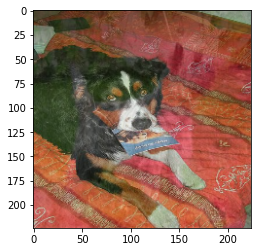

tf.Tensor(
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.31415248
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.6858475
 0.         0.         0.         0.         0.         0.
 0.         0.         0.     

In [15]:
# function for mixup
def mixup_2_images(image_a, image_b, label_a, label_b):
    ratio = tf.random.uniform([], 0, 1)
    
    if len(label_a.shape)==0:
        label_a = tf.one_hot(label_a, num_classes)
    if len(label_b.shape)==0:
        label_b = tf.one_hot(label_b, num_classes)
    mixed_image= (1-ratio)*image_a + ratio*image_b
    mixed_label = (1-ratio)*label_a + ratio*label_b
    
    return mixed_image, mixed_label

mixed_img, mixed_label = mixup_2_images(image_a, image_b, label_a, label_b)
plt.imshow(mixed_img.numpy())
plt.show()
print(mixed_label)

그러면 위에서 구현한 함수를 활용하여 배치 단위의 mixup() 함수를 구현해 본다.

In [16]:
def mixup(image, label, prob=1.0, batch_size=16, img_size=224, num_classes=120):
    mixed_imgs = []
    mixed_labels = []

    for i in range(batch_size):
        image_a = image[i]
        label_a = label[i]
        j = tf.cast(tf.random.uniform([],0,batch_size), tf.int32)
        image_b = image[j]
        label_b = label[j]
        mixed_img, mixed_label = mixup_2_images(image_a, image_b, label_a, label_b)
        mixed_imgs.append(mixed_img)
        mixed_labels.append(mixed_label)

    mixed_imgs = tf.reshape(tf.stack(mixed_imgs), (batch_size, img_size, img_size, 3))
    mixed_labels = tf.reshape(tf.stack(mixed_labels), (batch_size, num_classes))
    return mixed_imgs, mixed_labels

print('=3')

=3


## 4) 데이터셋 만들기

In [25]:
def onehot(image, label) :
    label = tf.one_hot(label, num_classes)
    return image, label

In [17]:
def apply_normalize_on_dataset(ds, is_test=False, batch_size=16, with_aug=False, with_cutmix=False, with_mixup=False):
    ds = ds.map(
        normalize_and_resize_img, 
        num_parallel_calls=2
    )
    if not is_test and with_aug:  # test dataset이 아니고 augmentation을 적용
        ds = ds.map(
            augment
        )
    ds = ds.batch(batch_size)
    if not is_test and with_cutmix:  # test datset이 아니고 cutmix를 적용
        ds = ds.map(
            cutmix,
            num_parallel_calls=2
        )
    if not is_test and mixup:  # test datset이 아니고 mixup 적용
        ds = ds.map(
            mixup,
            num_parallel_calls=2
        )
    else:
        ds = ds.map(
            onehot,
            num_parallel_calls=2
        )
    if not is_test:
        ds = ds.repeat()
        ds = ds.shuffle(200)
    ds = ds.prefetch(tf.data.experimental.AUTOTUNE)
    return ds

print('=3')

=3


cutmix, mixup 데이터 셋을 만들어 준다.

In [31]:
(ds_train, ds_test), ds_info = tfds.load(
    'stanford_dogs',
    split=['train', 'test'],
    as_supervised=True,
    shuffle_files=True,
    with_info=True,
)
ds_train_no_aug = apply_normalize_on_dataset(ds_train, with_aug=False)
ds_train_aug = apply_normalize_on_dataset(ds_train, with_aug=True)
ds_test = apply_normalize_on_dataset(ds_test, is_test=True)
ds_train_cutmix = apply_normalize_on_dataset(ds_train, with_aug=False, with_cutmix=True, with_mixup=False)
ds_train_mixup = apply_normalize_on_dataset(ds_train, with_aug=True, with_cutmix=False, with_mixup=True)

# 2. 모델 만들기
앞서 만들었던 것처럼 비교 실험을 위한 모델 두 개를 만들어 주세요. 모델은 ResNet-50을 사용합시다.

In [20]:
num_classes = ds_info.features["label"].num_classes
resnet50 = keras.models.Sequential([
    keras.applications.resnet.ResNet50(
        include_top=False,
        weights='imagenet',
        input_shape=(224,224,3),
        pooling='avg',
    ),
    keras.layers.Dense(num_classes, activation='softmax')
])
print('=3')

94781440/94765736 [==============================] - 2s 0us/step
=3


cutmix를 적용한 데이터셋으로 학습시킬 ResNet을 더 만들어준다.

In [21]:
cutmix_resnet50 = keras.models.Sequential([
    keras.applications.resnet.ResNet50(
        include_top=False,
        weights='imagenet',
        input_shape=(224,224,3),
        pooling='avg',
    ),
    keras.layers.Dense(num_classes, activation='softmax')
])
print('=3')

=3


mixup을 적용한 데이터셋으로 학습시킬 ResNet을 더 만들어 준다.

In [22]:
mixup_resnet50 = keras.models.Sequential([
    keras.applications.resnet.ResNet50(
        include_top=False,
        weights='imagenet',
        input_shape=(224,224,3),
        pooling='avg',
    ),
    keras.layers.Dense(num_classes, activation='softmax')
])
print('=3')

=3


# 3. 모델 훈련하기
모델을 훈련시켜 주세요.

<br>

주의!! 위에서 만든 CutMix나 Mixup을 사용하기 위해서는 앞에서 `resnet50`과 `aug_resnet50`을 훈련하는 데 사용했던 `sparse_categorical_crossentropy()` 대신 `categorical_crossentropy()`를 사용해 주세요!

<br>

> Q2. sparse_categorical_crossentropy()를 사용하지 못하는 이유가 뭘까요?<br><br>
우리가 cutmix(), mixup()을 구현하면서 label의 mix 때문에 더이상 label이 스칼라값을 가지지 못하고 **One-Hot 벡터** 형태로 변환되었기 때문





In [28]:
#EPOCH = 20  # Augentation 적용 효과를 확인하기 위해 필요한 epoch 수
EPOCH = 20

resnet50.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.01),
    metrics=['accuracy'],
)

history_resnet50_no_aug = resnet50.fit(
    ds_train_no_aug, # augmentation 적용하지 않은 데이터셋 사용
    steps_per_epoch=int(ds_info.splits['train'].num_examples/16),
    validation_steps=int(ds_info.splits['test'].num_examples/16),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True,
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


750/750 [==============================] - 104s 118ms/step - loss: 3.7484 - accuracy: 0.2297 - val_loss: 4.3564 - val_accuracy: 0.0799
Epoch 2/20
750/750 [==============================] - 88s 117ms/step - loss: 2.8559 - accuracy: 0.4767 - val_loss: 1.5356 - val_accuracy: 0.5861
Epoch 3/20
750/750 [==============================] - 88s 117ms/step - loss: 2.5532 - accuracy: 0.5986 - val_loss: 1.4244 - val_accuracy: 0.6031
Epoch 4/20
750/750 [==============================] - 88s 117ms/step - loss: 2.3808 - accuracy: 0.6630 - val_loss: 1.4511 - val_accuracy: 0.6058
Epoch 5/20
750/750 [==============================] - 88s 117ms/step - loss: 2.2510 - accuracy: 0.7074 - val_loss: 1.2019 - val_accuracy: 0.6676
Epoch 6/20
750/750 [==============================] - 88s 117ms/step - loss: 2.1308 - accuracy: 0.7592 - val_loss: 1.2696 - val_accuracy: 0.6531
Epoch 7/20
750/750 [==============================] - 90s 120ms/step - loss: 2.0639 - accuracy: 0.7797 - val_loss: 1.1880 - val_accuracy: 0.

In [33]:
#EPOCH = 20  # Augentation 적용 효과를 확인하기 위해 필요한 epoch 수
EPOCH = 20

cutmix_resnet50.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.01),
    metrics=['accuracy'],
)

history_resnet50_cutmix = cutmix_resnet50.fit(
    ds_train_cutmix, # augmentation 적용하지 않은 데이터셋 사용
    steps_per_epoch=int(ds_info.splits['train'].num_examples/16),
    validation_steps=int(ds_info.splits['test'].num_examples/16),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True,
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
750/750 [==============================] - 98s 119ms/step - loss: 4.5198 - accuracy: 0.0950 - val_loss: 3.8663 - val_accuracy: 0.1228
Epoch 2/20
750/750 [==============================] - 88s 117ms/step - loss: 3.9887 - accuracy: 0.2338 - val_loss: 1.5546 - val_accuracy: 0.5666
Epoch 3/20
750/750 [==============================] - 88s 118ms/step - loss: 3.7554 - accuracy: 0.3189 - val_loss: 1.5054 - val_accuracy: 0.6035
Epoch 4/20
750/750 [==============================] - 88s 118ms/step - loss: 3.6616 - accuracy: 0.3517 - val_loss: 1.3570 - val_accuracy: 0.6216
Epoch 5/20
750/750 [==============================] - 88s 118ms/step - loss: 3.5576 - accuracy: 0.3915 - val_loss: 1.4424 - val_accuracy: 0.6151
Epoch 6/20
750/750 [==============================] - 88s 118ms/step - loss: 3.4726 - accuracy: 0.4277 - val_loss: 1.3503 - val_accuracy: 0.6403
Epoch 7/20
750/750 [==============================] - 88s 118ms/step - loss: 3.4135 - accuracy: 0.4478 - val_loss: 1.2709 - val_ac

In [34]:
#EPOCH = 20  # Augentation 적용 효과를 확인하기 위해 필요한 epoch 수
EPOCH = 20

mixup_resnet50.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.01),
    metrics=['accuracy'],
)

history_resnet50_mixup = mixup_resnet50.fit(
    ds_train_mixup, # augmentation 적용하지 않은 데이터셋 사용
    steps_per_epoch=int(ds_info.splits['train'].num_examples/16),
    validation_steps=int(ds_info.splits['test'].num_examples/16),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True,
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


750/750 [==============================] - 95s 118ms/step - loss: 3.7519 - accuracy: 0.2285 - val_loss: 3.9903 - val_accuracy: 0.1267
Epoch 2/20
750/750 [==============================] - 88s 117ms/step - loss: 2.9296 - accuracy: 0.4482 - val_loss: 1.7049 - val_accuracy: 0.5266
Epoch 3/20
750/750 [==============================] - 88s 118ms/step - loss: 2.6779 - accuracy: 0.5484 - val_loss: 1.4849 - val_accuracy: 0.5858
Epoch 4/20
750/750 [==============================] - 88s 118ms/step - loss: 2.5170 - accuracy: 0.6028 - val_loss: 1.2538 - val_accuracy: 0.6475
Epoch 5/20
750/750 [==============================] - 89s 118ms/step - loss: 2.3952 - accuracy: 0.6497 - val_loss: 1.2068 - val_accuracy: 0.6596
Epoch 6/20
750/750 [==============================] - 89s 119ms/step - loss: 2.2762 - accuracy: 0.6972 - val_loss: 1.3307 - val_accuracy: 0.6343
Epoch 7/20
750/750 [==============================] - 90s 120ms/step - loss: 2.2042 - accuracy: 0.7216 - val_loss: 1.2125 - val_accuracy: 0.6

# 4. 훈련 과정 시각화하기
훈련 과정의 히스토리를 그래프로 시각화해 주세요.

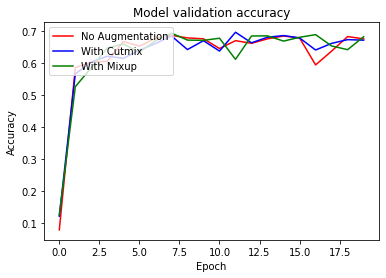

In [35]:
plt.plot(history_resnet50_no_aug.history['val_accuracy'], 'r')
plt.plot(history_resnet50_cutmix.history['val_accuracy'], 'b')
plt.plot(history_resnet50_mixup.history['val_accuracy'], 'g')
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['No Augmentation', 'With Cutmix', 'With Mixup'], loc='upper left')
plt.show()

# 5. Augmentation에 의한 모델 성능 비교
No Augmentation, 기본 Augmentation, 기본 + CutMix 적용, 기본 + Mixup 적용 이상 4가지 경우의 데이터셋에 대해 훈련된 ResNet50 분류기의 견종 분류 정확도 성능을 비교해 보고, Augmentation 방법들의 영향도에 대해 분석해 보세요.



# 회고

## 공부한 내용

## 루브릭 평가 지표를 맞추기 위해 시도한 것들

|평가문항|상세기준|
|:------|:---|
|1. CutMix와 MixUp 기법을 ResNet50 분류기에 성공적으로 적용하였는가?|CutMix와 MixUp을 적용한 데이터셋으로 훈련한 각각의 ResNet 모델이 수렴하였다.|
|2. 다양한 실험을 통해 태스크에 최적인 Augmentation 기법을 찾아내었는가?|Augmentation 적용을 통해 Augmentaion 미적용시 대비 5% 이상의 성능향상을 확인함|
|3. 여러가지 Augmentation 기법을 적용한 결과를 체계적으로 비교분석하였는가?|기본 Augmentation, CutMix, MixUp이 적용된 결과를 시각화와 함께 체계적으로 분석하였다.